<a href="https://colab.research.google.com/github/srgmnagar/VOIS_AICTE_Oct2025_SargamNagar/blob/main/SargamNagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA WRANGLING**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [11]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [13]:
df.isna().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [14]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['instant_bookable'].value_counts()

,count
instant_bookable,
0.0,51186
1.0,50767


In [17]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [18]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [19]:
df['price'].value_counts()

,count
price,
206.0,135
1056.0,131
481.0,129
833.0,127
573.0,126
...,...
369.0,57
923.0,57
786.0,54


In [20]:
df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41630
Queens,13197
Bronx,2694
Staten Island,949
brookln,1
manhatan,1


In [21]:
df['neighbourhood'].value_counts()


,count
neighbourhood,
Bedford-Stuyvesant,7898
Williamsburg,7732
Harlem,5441
Bushwick,4956
Hell's Kitchen,3949
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


In [22]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [23]:
df['price']=df['price'].replace('[\$,]','',regex=True).astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1966795209.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype('float')


In [24]:
df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3500339805.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype('float')


In [25]:
df.rename(columns={
    'price':'price(usd)',
    'service fee':'service fee(usd)'
},inplace=True)

In [26]:
df.isna().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [27]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
id                                 0.000000
NAME                               0.264555
host id                            0.000000
host_identity_verified             0.283172
host name                          0.397813
neighbourhood group                0.028415
neighbourhood                      0.015677
lat                                0.007839
long                               0.007839
country                            0.521272
country code                       0.128358
instant_bookable                   0.102883
cancellation_policy                0.074467
room type                          0.000000
Construction year                  0.209685
price(usd)                         0.242019
service fee(usd)                   0.267495
minimum nights                     0.391934
number of reviews                  0.179310
last review                       15.512748
reviews per month                 15.499030
review rate number             

In [28]:
columns_to_drop_rows = missing_percentages[missing_percentages < 1].index.tolist()
df.dropna(subset=columns_to_drop_rows, inplace=True)

In [29]:
df.loc[df['number of reviews'] == 0, 'reviews per month'] = df.loc[df['number of reviews'] == 0, 'reviews per month'].fillna(0)

In [30]:
df['reviews per month'].isna().sum()

np.int64(12)

In [31]:
df['last review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

/tmp/ipython-input-1284711498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)


In [32]:
df.isna().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [33]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [34]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price(usd),service fee(usd),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


In [35]:
df['Construction year']=df['Construction year'].astype('int')

In [36]:
df['number of reviews']=df['number of reviews'].astype('int')

In [37]:
df['reviews per month']=df['reviews per month'].astype('float')

In [38]:
df['minimum nights'].value_counts()

,count
minimum nights,
1.0,24500
2.0,22818
3.0,15541
30.0,11188
4.0,6388
...,...
-125.0,1
125.0,1
34.0,1


In [39]:
negative_min_nights = df[df['minimum nights'] < 0]
print("Rows with negative 'minimum nights':")
display(negative_min_nights)

Rows with negative 'minimum nights':


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price(usd),service fee(usd),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,2008,1155.0,231.0,-10.0,213,2019-06-24,2.00,5.0,2.0,19.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,2015,779.0,156.0,-1.0,82,2019-05-19,0.94,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,2008,874.0,175.0,-10.0,68,2019-06-10,0.69,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,2021,920.0,184.0,-12.0,203,2019-07-06,2.14,5.0,3.0,77.0
478,1265335,Charming upper west side apartment,89878315253,unconfirmed,Alen,Manhattan,Upper West Side,40.77886,-73.98042,United States,...,2022,410.0,82.0,-2.0,129,2019-06-07,1.33,2.0,1.0,381.0
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,...,2022,413.0,83.0,-3.0,42,2019-05-18,0.44,5.0,1.0,292.0
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,2003,1200.0,240.0,-1223.0,0,1900-01-01,0.00,2.0,4.0,341.0
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,2009,711.0,142.0,-365.0,13,2019-07-07,5.91,4.0,4.0,0.0
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,2022,85.0,17.0,-200.0,3,2019-04-23,1.06,2.0,1.0,157.0
69749,39523709,Amazing location! 10ft from L train,62132542936,verified,Giorgia & Benjamin,Brooklyn,Williamsburg,40.71534,-73.94906,United States,...,2012,328.0,66.0,-125.0,146,2019-06-23,1.78,1.0,1.0,46.0


**Reasoning**:
Filter the DataFrame to show rows where 'minimum nights' is greater than 365 to identify unusually high values.



In [40]:
high_min_nights = df[df['minimum nights'] > 365]
print("Rows with unusually high 'minimum nights':")
display(high_min_nights)

Rows with unusually high 'minimum nights':


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price(usd),service fee(usd),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
167,1093570,Convenient cozy cheap apt Manhattan,29280666536,unconfirmed,Agata,Manhattan,Harlem,40.82704,-73.94907,United States,...,2011,375.0,75.0,371.0,2,2015-11-02,NaN,4.0,1.0,70.0
299,1166474,Bright Beautiful Brooklyn,66810551515,unconfirmed,Russell,Brooklyn,Greenpoint,40.73119,-73.95578,United States,...,2011,614.0,123.0,452.0,6,2016-11-13,0.10,4.0,1.0,351.0
473,1262574,Spacious Quiet rm - 20mins to Midtown,60243935879,unconfirmed,Sarah,Manhattan,Washington Heights,40.84468,-73.94303,United States,...,2016,409.0,82.0,398.0,34,2019-06-15,0.35,1.0,1.0,182.0
1306,1722640,800sqft apartment with huge terrace,82992796482,unconfirmed,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,United States,...,2011,1179.0,236.0,370.0,6,2018-04-15,0.09,5.0,1.0,166.0
5768,4187002,Prime W. Village location 1 bdrm,62526606377,verified,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,United States,...,2008,379.0,76.0,1250.0,2,2014-11-09,0.03,2.0,1.0,26.0
7356,5064055,Beautiful Fully Furnished 1 bed/bth,88663579912,verified,Aliya,Queens,Long Island City,40.75104,-73.93863,United States,...,2013,129.0,26.0,500.0,30,2018-06-24,0.57,2.0,1.0,193.0
8015,5428021,Wonderful Large 1 bedroom,60995434243,verified,John,Manhattan,Harlem,40.82135,-73.95521,United States,...,2010,920.0,184.0,500.0,0,1900-01-01,0.00,1.0,1.0,185.0
10830,6982745,Brand New Luxury Apt Lease Takeover,69119028013,verified,Shining,Queens,Long Island City,40.74654,-73.95778,United States,...,2017,890.0,178.0,480.0,0,1900-01-01,0.00,1.0,1.0,313.0
11194,7183782,Zen Room in Crown Heights Brooklyn,10818126630,unconfirmed,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,United States,...,2022,1156.0,231.0,500.0,10,2016-09-22,0.22,3.0,1.0,212.0
13405,8404918,Historic Designer 2 Bed. Apartment,43219664735,verified,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,United States,...,2016,805.0,161.0,999.0,2,2018-01-04,0.07,3.0,1.0,137.0


In [41]:
df.drop(negative_min_nights.index, inplace=True)
df.drop(high_min_nights.index, inplace=True)

In [42]:
df['minimum nights'] = df['minimum nights'].astype(int)

In [43]:
print(df['minimum nights'].value_counts())
print(df['minimum nights'].dtype)

minimum nights
1      24500
2      22818
3      15541
30     11188
4       6388
       ...  
364        1
333        1
119        1
125        1
34         1
Name: count, Length: 120, dtype: int64
int64


In [44]:
df['review rate number'].value_counts()

,count
review rate number,
5.0,22524
4.0,22398
3.0,22390
2.0,22264
1.0,8870


In [46]:
display(df['neighbourhood group'].value_counts())

,count
neighbourhood group,
Manhattan,42006
Brooklyn,40174
Queens,12761
Bronx,2589
Staten Island,915
brookln,1


In [47]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [48]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [49]:
df['availability 365'].value_counts()

,count
availability 365,
0.0,22759
365.0,2400
364.0,1130
89.0,732
1.0,714
...,...
408.0,30
391.0,30
-6.0,29


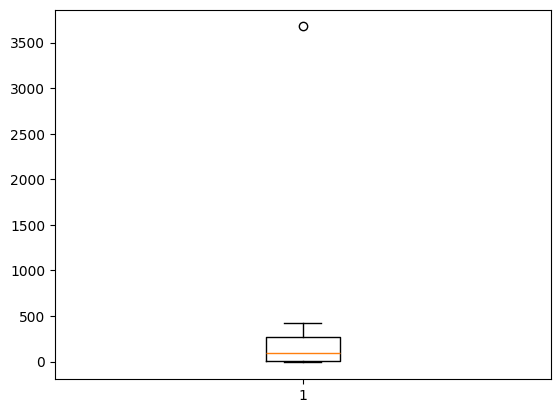

In [50]:
plt.boxplot(df['availability 365'])
plt.show()

In [51]:
df['availability 365'] = df['availability 365'].clip(upper=500)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98446 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98446 non-null  int64         
 1   NAME                            98446 non-null  object        
 2   host id                         98446 non-null  int64         
 3   host_identity_verified          98446 non-null  object        
 4   host name                       98446 non-null  object        
 5   neighbourhood group             98446 non-null  object        
 6   neighbourhood                   98446 non-null  object        
 7   lat                             98446 non-null  float64       
 8   long                            98446 non-null  float64       
 9   country                         98446 non-null  object        
 10  country code                    98446 non-null  object        
 11  instan

In [53]:
original_rows = 102599
current_rows = len(df)
deleted_rows = original_rows - current_rows
percentage_deleted = (deleted_rows / original_rows) * 100

print(f"Original number of rows: {original_rows}")
print(f"Current number of rows: {current_rows}")
print(f"Number of rows deleted: {deleted_rows}")
print(f"Percentage of rows deleted: {percentage_deleted:.2f}%")

Original number of rows: 102599
Current number of rows: 98446
Number of rows deleted: 4153
Percentage of rows deleted: 4.05%


# **EDA**

In [54]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price(usd),service fee(usd),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,9.844600e+04,9.844600e+04,98446.000000,98446.000000,98446.000000,98446.000000,98446.000000,98446.000000,98446.000000,98446.000000,98446,98435.000000,98446.000000,98446.000000,98446.000000
mean,2.927958e+07,4.924849e+10,40.728032,-73.949628,0.497704,2012.487171,625.493448,125.099486,7.824462,27.327276,2001-02-21 16:25:47.569225856,1.166629,3.278752,7.976322,140.840898
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,1.000000,0.000000,1900-01-01 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.518178e+07,2.455626e+10,40.688710,-73.982570,0.000000,2008.000000,340.000000,68.000000,2.000000,1.000000,2017-08-03 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.932797e+07,4.910627e+10,40.722260,-73.954440,0.000000,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.333444e+07,7.398463e+10,40.762740,-73.932270,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.720000,4.000000,2.000000,268.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,365.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,500.000000
std,1.621827e+07,2.854504e+10,0.055834,0.049547,0.499997,5.760842,331.739213,66.351129,16.945031,49.209909,NaN,1.686182,1.285133,32.463448,134.940751


In [57]:
#properties of airbnb
properties_types=df['room type'].value_counts()
properties_types

,count
room type,
Entire home/apt,51618
Private room,44597
Shared room,2123
Hotel room,108


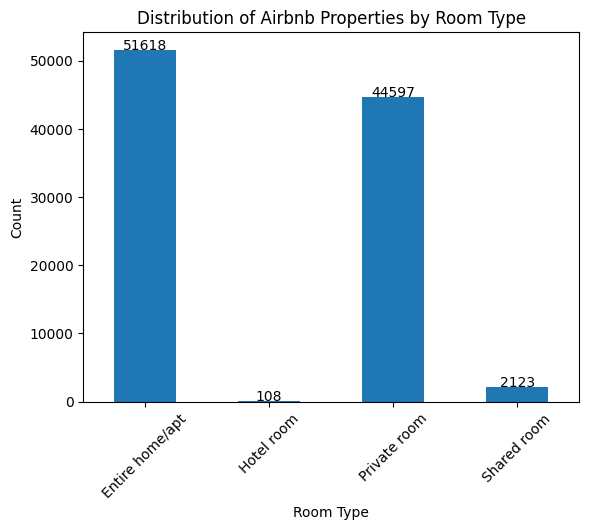

In [69]:
properties_types.sort_index().plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(properties_types.sort_index()):
    plt.text(i, v + 50, str(v), ha='center')
plt.title('Distribution of Airbnb Properties by Room Type')
plt.show()

In [67]:
#which neighbourhood grup has highest number of listings
df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,42006
Brooklyn,40175
Queens,12761
Bronx,2589
Staten Island,915


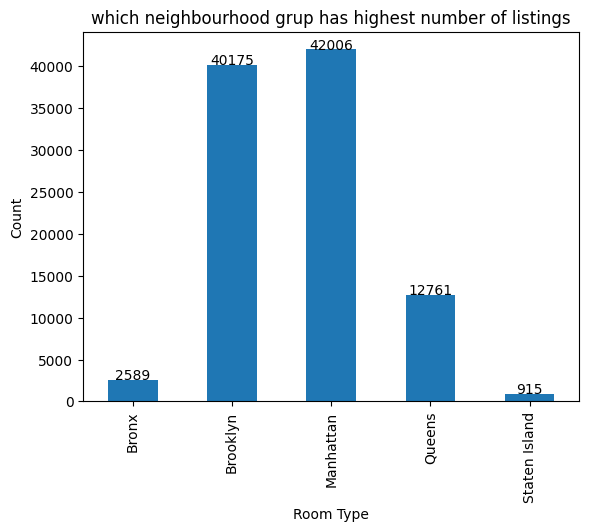

In [68]:
df['neighbourhood group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
for i, v in enumerate(df['neighbourhood group'].value_counts().sort_index()):
    plt.text(i, v + 50, str(v), ha='center')
plt.title('which neighbourhood grup has highest number of listings')
plt.show()

In [70]:
#highest avg prices by neighbourhood
avg_prices=df.groupby('neighbourhood group')['price(usd)'].mean()
avg_prices

,price(usd)
neighbourhood group,
Bronx,630.558903
Brooklyn,626.330056
Manhattan,623.186140
Queens,629.647990
Staten Island,622.410929


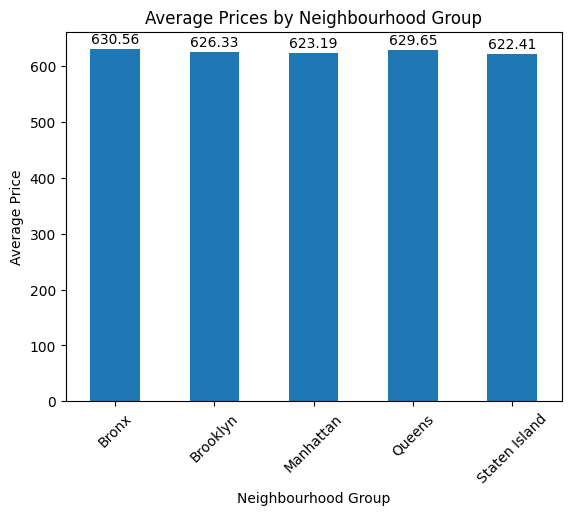

In [75]:
avg_prices.sort_index().plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.title('Average Prices by Neighbourhood Group')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
for i, v in enumerate(avg_prices.sort_index()):
    plt.text(i, v + 10, f'{v:.2f}', ha='center')
plt.title('Average Prices by Neighbourhood Group')
plt.show()

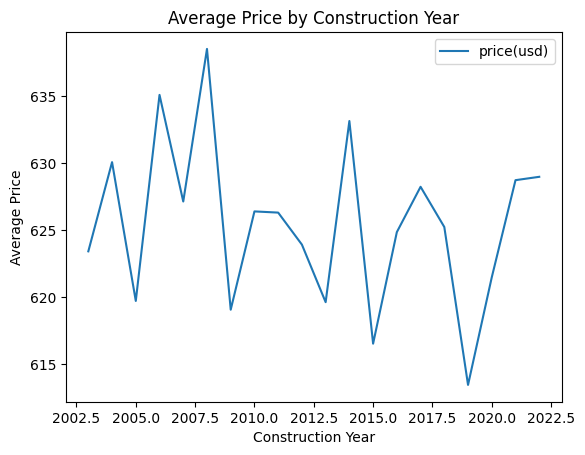

In [78]:
df.groupby(df['Construction year'])['price(usd)'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Average Price by Construction Year')
plt.show()
#no relationship

<Axes: xlabel='host name'>

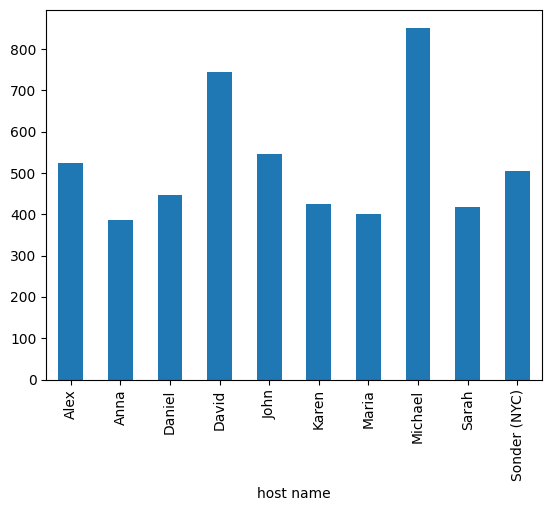

In [81]:
top_hosts=df['host name'].value_counts().sort_values(ascending=False).head(10)
top_hosts.sort_index().plot(kind='bar')

In [83]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price(usd)', 'service fee(usd)', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

<Axes: xlabel='host name'>

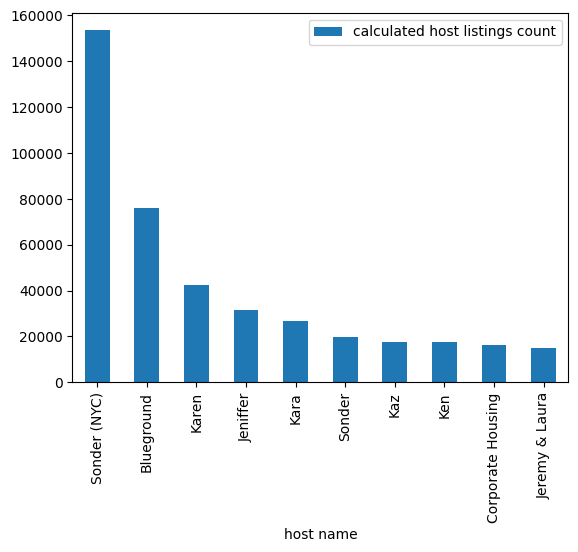

In [84]:
df.groupby(df['host name'])['calculated host listings count'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind='bar')

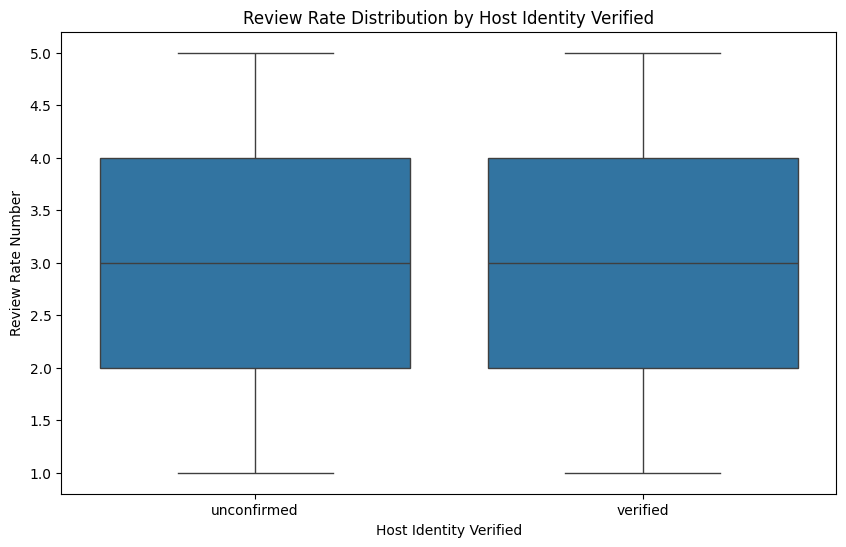

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='host_identity_verified', y='review rate number')
plt.title('Review Rate Distribution by Host Identity Verified')
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.show()
#no relation between verified identities n positive reviews

In [100]:
df['price(usd)'].corr(df['service fee(usd)'])

np.float64(0.9999908824634282)

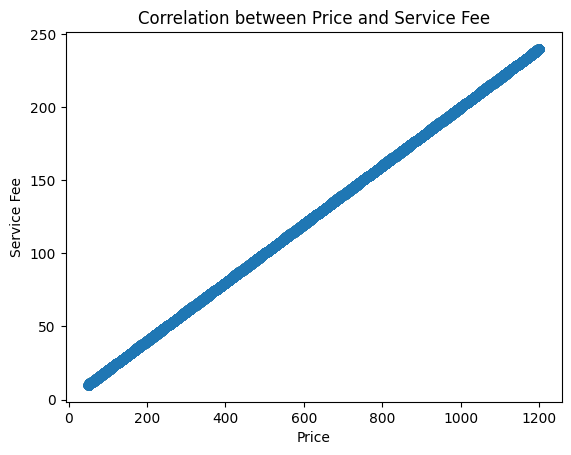

In [104]:
sns.regplot(x=df['price(usd)'],y=df['service fee(usd)'])
plt.title('Correlation between Price and Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.show()

In [106]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.354872
                    Private room               3.318725
                    Shared room                3.296296
Brooklyn            Entire home/apt            3.248888
                    Hotel room                 3.833333
                    Private room               3.263711
                    Shared room                3.342640
Manhattan           Entire home/apt            3.278049
                    Hotel room                 3.500000
                    Private room               3.279162
                    Shared room                3.264195
Queens              Entire home/apt            3.346084
                    Hotel room                 3.750000
                    Private room               3.307692
                    Shared room                3.368571
Staten Island       Entire home/apt            3.329694
                    Private room               3.478555
                    Shared room                3.428571

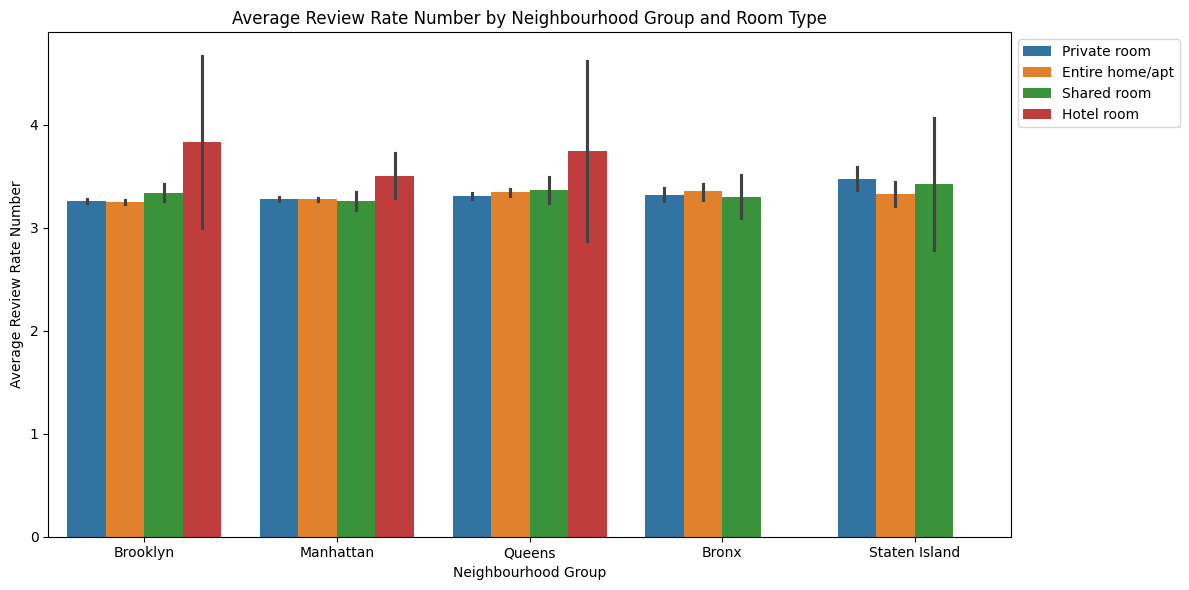

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

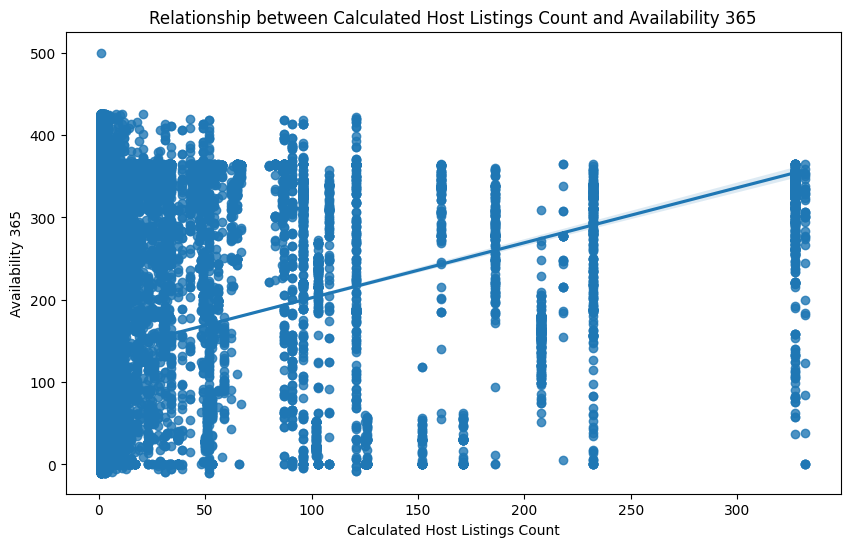

In [120]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='calculated host listings count', y='availability 365')
plt.title('Relationship between Calculated Host Listings Count and Availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.show()

In [121]:
df['calculated host listings count'].corr(df['availability 365'])
#less

np.float64(0.16089907471378911)